##         Data Mining Project - Sales Analysis For Walmart

###                                             By- Palak Pant(086), Ritik Sawhney(088), Shiv Vikram Singh (120)

##  

### Importing Necessary Library Functions
Pandas for loading data and converting into Data Frames and then for Manipulating data

Sklearn for Implementing Various Algorithms and Creating Training and Testing data

MatPlotLib for representing Pie-charts 

Seaborn for representing BoxPlots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
import numpy as np

### Loading the datasets (Originally from Kaggle) using Pandas

In [2]:
features = pd.read_csv("features.csv", delimiter = ",")
train = pd.read_csv("train.csv", delimiter = ",")
test = pd.read_csv("test.csv", delimiter = ",")
stores = pd.read_csv("stores.csv", delimiter = ",")

### Features of our Datasets

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Checking the Number of Null Values in all the features of our Dataset

In [5]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

We see that there are a lot of Not a Null (NaN) values for the MarkDowns (1-5) and some NaN values of Features CPI and Unemployment.

## Data Cleaning

Creating a Data Frame(df) of the features file to perform Data Cleaning and Manipulation

In [6]:
df = features.copy()

In [7]:
df.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


Since there is no point in having so many NaN Markdown Values, we decide to drop MarkDowns1,2,4,5 and keep Markdown3 as a median value of the MarkDowns.

In [8]:
df.drop('MarkDown1', axis = 1, inplace = True)
df.drop('MarkDown2', axis = 1, inplace = True)
df.drop('MarkDown4', axis = 1, inplace = True)
df.drop('MarkDown5', axis = 1, inplace = True)

There are fewer NaN values of Features- CPI and Unemployment. So we replace these NaN values with the mean values on their respective columns.

Also, Since there are a lot of NaN values in MarkDown3, we replace these values by zeros(0)

In [9]:
df.CPI.fillna(df.CPI.mean(), inplace = True)
df.Unemployment.fillna(df.Unemployment.mean(), inplace = True)

df.MarkDown3.fillna(0, inplace = True)

Now we check the NaN values in each feature again and find that there are no NaN values after the Data Cleaning

In [10]:
df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown3       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

So far, Our Data Frame looks like this -

In [11]:
df.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,0.0,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,0.0,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,0.0,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,0.0,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,0.0,210.622857,7.808,False


Lets observe the Training and Stores Data files now...

In [12]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [13]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


## Data Integration
Merging the training data file with the original data frame of the features dataset into a new Data Frame(new_data) and then merging the stores dataset into the new_data frame to create the Final Dataframe(final_data) containing all the features.

In [14]:
new_data = pd.merge(df, train, on = ['Store','Date','IsHoliday'], how = 'inner')
final_data = pd.merge(new_data, stores, how = 'inner',on = ['Store'])

### Datasets containing dates
Since our Weekly sales is also dependent upon the 'Date' features and datasets containing dates need to be arranged in a manner that all the dates are sequential so we sort our final_data data frame by date.

In [15]:
final_data = final_data.sort_values(by = 'Date')

## Data Analysis

We previously observed that store datasets contains the 'Type' features which tells us that there are 3 types of Stores(A, B, C) and their count is as follows-

Type A - 22

Type B - 17

Type C - 06

----------
Total - 45

### Pie-chart Representation of Various Store Types
We represented the propotion of each store type using pie-chart. 

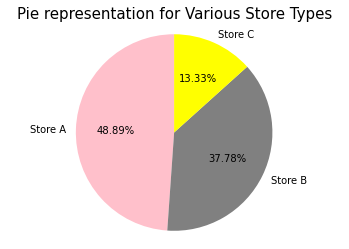

In [16]:
labels = 'Store A', 'Store B', 'Store C'
num = [(22/(45)) * 100, (17/(45)) * 100, (6/(45)) * 100]
colors = ["Pink", "Grey", "Yellow"]

plt.pie(num, labels = labels, colors = colors, autopct = "%.2f%%", startangle = 90)
plt.axis('equal')
plt.title("Pie representation for Various Store Types", fontsize = 15)
plt.show()

## BoxPlot Representation for the Sizes of different types of stores

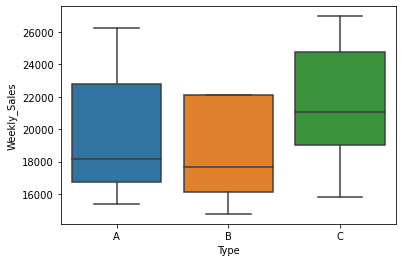

In [17]:
sales = pd.concat([stores['Type'], train['Weekly_Sales']], axis=1)
plot = sbn.boxplot(x = 'Type', y= 'Weekly_Sales', data = sales, showfliers = False)

In [18]:
print('Count of Sales on Non-Holidays : ', train[train['IsHoliday']==False]['Weekly_Sales'].count())
print('Count of Sales on Holidays : ',train[train['IsHoliday']==True]['Weekly_Sales'].count())

Count of Sales on Non-Holidays :  391909
Count of Sales on Holidays :  29661


### BoxPlot to represent Weekly Sales with respect to Holidays and Non-Holidays

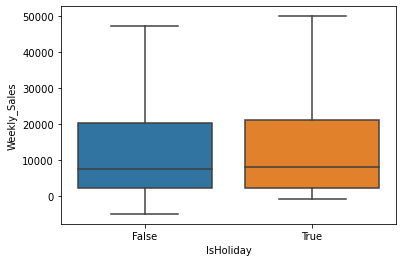

In [19]:
plot = sbn.boxplot(x = train['IsHoliday'], y = train['Weekly_Sales'], showfliers = False)

### Replacing the Date Features
Adding the columns 'Day', 'Year', and 'Days to Next Christmas' and removing the 'Date' features instead.

In [20]:
final_data['Year'] = pd.to_datetime(final_data['Date'], format = '%Y-%m-%d').dt.year
test['Year'] = pd.to_datetime(test['Date'], format = '%Y-%m-%d').dt.year

final_data["Day"] = pd.to_datetime(final_data["Date"], format = "%Y-%m-%d").dt.day
test["Day"] = pd.to_datetime(test["Date"], format = "%Y-%m-%d").dt.day

final_data['Days to Next Christmas'] = (pd.to_datetime(final_data['Year'].astype(str)+"-12-31", format = '%Y-%m-%d') -
                                   pd.to_datetime(final_data["Date"], format = "%Y-%m-%d")).dt.days.astype(int)
test["Days to Next Christmas"] = (pd.to_datetime(test["Year"].astype(str) + "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(test["Date"], format="%Y-%m-%d")).dt.days.astype(int)

final_data.drop('Date', axis = 1, inplace = True)

In [21]:
final_data.head()

,Store,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Day,Days to Next Christmas
0,1,42.31,2.572,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010,5,329
330761,35,27.19,2.784,0.0,135.352461,9.262,False,3,14612.19,B,103681,2010,5,329
330762,35,27.19,2.784,0.0,135.352461,9.262,False,4,26323.15,B,103681,2010,5,329
330763,35,27.19,2.784,0.0,135.352461,9.262,False,5,36414.63,B,103681,2010,5,329
330764,35,27.19,2.784,0.0,135.352461,9.262,False,6,11437.81,B,103681,2010,5,329


### Adding the Types of Stores features into the Data Frame

In [22]:
typef = pd.get_dummies(final_data.Type)
final_data = pd.concat([final_data, typef], axis=1)
final_data.drop(columns = 'Type', inplace = True)

In [23]:
final_data.head(3546)

,Store,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Year,Day,Days to Next Christmas,A,B,C
0,1,42.31,2.572,0.0,211.096358,8.106,False,1,24924.50,151315,2010,5,329,1,0,0
330761,35,27.19,2.784,0.0,135.352461,9.262,False,3,14612.19,103681,2010,5,329,0,1,0
330762,35,27.19,2.784,0.0,135.352461,9.262,False,4,26323.15,103681,2010,5,329,0,1,0
330763,35,27.19,2.784,0.0,135.352461,9.262,False,5,36414.63,103681,2010,5,329,0,1,0
330764,35,27.19,2.784,0.0,135.352461,9.262,False,6,11437.81,103681,2010,5,329,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237165,25,19.64,2.773,0.0,204.385747,8.187,True,2,25665.57,128107,2010,12,322,0,1,0
39905,5,39.81,2.548,0.0,211.800470,6.566,True,74,3603.23,34875,2010,12,322,0,1,0
39903,5,39.81,2.548,0.0,211.800470,6.566,True,71,448.00,34875,2010,12,322,0,1,0
39879,5,39.81,2.548,0.0,211.800470,6.566,True,29,1754.50,34875,2010,12,322,0,1,0


### Replacing the entries of 'IsHoliday' feature from Bool Values to Integer values 0 and 1
0 for False

1 for True

In [24]:
def f(s):
    if s == True:
        return 1
    else:
        return 0

final_data['IsHoliday2'] = final_data.IsHoliday.apply(f)
final_data['IsHoliday'] = final_data['IsHoliday2']
final_data.drop('IsHoliday2', axis = 1, inplace = True)

## Input Data

The Input Data(X) contains all the necessary features(Store, Temperature, Fuel_Price, MarkDown3, CPI, Unemployment, IsHoliday, Dept, Size, Year, Day, Days to Next Christmas, Types(A, B, C)). 

In [25]:
X = final_data.drop('Weekly_Sales', axis = 1)
X.head(3546)

,Store,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Dept,Size,Year,Day,Days to Next Christmas,A,B,C
0,1,42.31,2.572,0.0,211.096358,8.106,0,1,151315,2010,5,329,1,0,0
330761,35,27.19,2.784,0.0,135.352461,9.262,0,3,103681,2010,5,329,0,1,0
330762,35,27.19,2.784,0.0,135.352461,9.262,0,4,103681,2010,5,329,0,1,0
330763,35,27.19,2.784,0.0,135.352461,9.262,0,5,103681,2010,5,329,0,1,0
330764,35,27.19,2.784,0.0,135.352461,9.262,0,6,103681,2010,5,329,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237165,25,19.64,2.773,0.0,204.385747,8.187,1,2,128107,2010,12,322,0,1,0
39905,5,39.81,2.548,0.0,211.800470,6.566,1,74,34875,2010,12,322,0,1,0
39903,5,39.81,2.548,0.0,211.800470,6.566,1,71,34875,2010,12,322,0,1,0
39879,5,39.81,2.548,0.0,211.800470,6.566,1,29,34875,2010,12,322,0,1,0


## Output Data

The Output Data(Y) contains the feature 'Weekly Sales' which will be predicted by different Models.

In [26]:
Y = final_data['Weekly_Sales']
Y.head()

0         24924.50
330761    14612.19
330762    26323.15
330763    36414.63
330764    11437.81
Name: Weekly_Sales, dtype: float64

## Splitting Data into Training and Testing Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

## Implementation of Various Models

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(X_train, Y_train)
Y_pred_alg1 = alg1.predict(X_test)

In [29]:
accuracy_alg1 = alg1.score(X_test, Y_test)
print("Accuracy of Linear Regression: {0} %".format(accuracy_alg1 * 100))

Accuracy of Linear Regression: 8.896944205060542 %


### Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
alg2 = DecisionTreeRegressor(random_state = 0)
alg2.fit(X_train, Y_train)
Y_pred_alg2 = alg2.predict(X_test)

In [31]:
accuracy_alg2 = alg2.score(X_test, Y_test) 
print("Accuracy of Decision Tree Regressor: {0} %".format(accuracy_alg2 * 100))

Accuracy of Decision Tree Regressor: 95.7248418580207 %


### Random Forest Regressor 

In [32]:
from sklearn.ensemble import RandomForestRegressor
alg3 = RandomForestRegressor(n_estimators = 400, max_depth = 15, n_jobs= 5)        
alg3.fit(X_train, Y_train)
Y_pred_alg3 = alg3.predict(X_test)

In [33]:
accuracy_alg3 = alg3.score(X_test, Y_test)
print("Accuracy of Random Forest Regressor: {0} %".format(accuracy_alg3 * 100))

Accuracy of Random Forest Regressor: 96.26938736883756 %


## Accuracy of Models
### After Implementation of the three Regression Models, the accuracy of each model is as follows-
Accuracy of Linear Regression: 8.90 %

Accuracy of Decision Tree Regressor: 95.72 %

Accuracy of Random Forest Regressor: 96.26 %

### Since the Random Forest Regression Model performed the best, we can use it to predict the 'Weekly Sales of Walmart' for future data.